2.7 Neural Network Class - MNIST Test (July 2023)

We will give the neural network a handwritten number, that it has not seen before, to identify

References

> Make Your Own Neural Network by Tariq Rashid

> https://github.com/makeyourownneuralnetwork

> Matplotlib

> https://matplotlib.org

> Numpy

> https://numpy.org

> Pandas

> https://pandas.pydata.org

> Python

> https://www.python.org

> https://docs.python.org/3/library/csv.html

> Scipy

> https://scipy.org

> Wikipedia

> https://en.wikipedia.org/wiki/MNIST_database

> https://en.wikipedia.org/wiki/Normalization_(image_processing)

> https://en.wikipedia.org/wiki/Spatial_anti-aliasing

IDE
> Google Colab

> https://colab.research.google.com




A class is a reuseable blueprint for creating objects.

Our draft class will simulate a biological neural network by having three parts that serve to:

> initialize - set quantity of input, hidden, & output nodes

> train - refine network weights by using training data

> query - given input data, provide an answer from the output nodes

Here is the draft class that we will use for recognizing hand-written numbers via neural network

In [ ]:
import numpy as np
import scipy.special

# draft class definition for a neural network
class neuralNetwork:

  # intialize the neural network
  def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
    # layers and learning rates
    self.iNodes = inputNodes
    self.hNodes = hiddenNodes
    self.oNodes = outputNodes
    self.learnRate = learningRate
    # link weights connecting the layers via matrices
    self.wih = np.random.normal(0.0, pow(self.iNodes, -0.5), (self.hNodes, self.iNodes))
    self.who = np.random.normal(0.0, pow(self.hNodes, -0.5), (self.oNodes, self.hNodes))
    # sigmoid activation function
    self.activation_function = lambda x: scipy.special.expit(x)
    pass

  # train the neural network
  def train(self, inputs_list, targets_list):
    # convert the inputs list to a 2d array
    inputs = np.array(inputs_list, ndmin = 2).T
    # convert the targets list to a 2d array
    targets = np.array(targets_list, ndmin = 2).T
    # calculate signals into the hidden layer
    hidden_inputs = np.dot(self.wih, inputs)
    # calculate signals emerging from the hidden layer
    hidden_outputs = self.activation_function(hidden_inputs)
    # calculate signals into final output layer
    final_inputs = np.dot(self.who, hidden_outputs)
    # calculate signals emerging from the final output layer
    final_outputs = self.activation_function(final_inputs)

    # output layer error is (target - actual)
    output_errors = targets - final_outputs
    # hidden layer error
    hidden_errors = np.dot(self.who.T, output_errors)
    # update the link weights between hidden & output layers
    self.who += self.learnRate * np.dot((output_errors * final_outputs *
      (1.0 - final_outputs)), np.transpose(hidden_outputs))
    # update the link weights between input & hidden layers
    self.wih += self.learnRate * np.dot((hidden_errors * hidden_outputs *
      (1.0 - hidden_outputs)), np.transpose(inputs))
    pass

  # query the neural network
  def query(self, inputs_list):
    # convert inputs list to 2d array
    inputs = np.array(inputs_list, ndmin=2).T
    # calculate signals into hidden layer
    hidden_inputs = np.dot(self.wih, inputs)
    # calculate the signals emerging from hidden layer
    hidden_outputs = self.activation_function(hidden_inputs)
    # calculate signals into final output layer
    final_inputs = np.dot(self.who, hidden_outputs)
    # calculate the signals emerging from final output layer
    final_outputs = self.activation_function(final_inputs)
    return final_outputs


Here is test code for the class

In [ ]:
# test
inputNodes = 3
hiddenNodes = 3
outputNodes = 3
learningRate = 0.3
n = neuralNetwork(inputNodes, hiddenNodes, outputNodes, learningRate)
n.query([1.0, 0.5, -1.5])

array([[0.48900539],
       [0.60154223],
       [0.72015492]])


There is a collection of images of handwritten numbers used by artificial intelligence researchers as a popular set to test their latest ideas and algorithms.

We will use it as well. The collection is broken up into two subsets:

> http://www.pjreddie.com/media/files/mnist_train.csv

> The training set​ is the set of 60,000​ labelled examples used to train the neural network. Labelled​ means the inputs come with the desired output, that is, what the answer should be.

> http://www.pjreddie.com/media/files/mnist_test.csv

> The smaller test set​ of 10,000​ is used to see how well our idea or algorithm works. This too contains the correct labels so we can check to see if our own neural network got the answer right or not.

We will start our experiments with subsets of the subsets

> https://raw.githubusercontent.com/makeyourownneuralnetwork/makeyourownneuralnetwork/master/mnist_dataset/mnist_train_100.csv

> 100 records from the training subset

> https://raw.githubusercontent.com/makeyourownneuralnetwork/makeyourownneuralnetwork/master/mnist_dataset/mnist_test_10.csv


> 10 records from the test subset

We will drag and drop the files we want from  our storage drive (we can use the desktop or the cloud for storage) into the goggle colab file icon (left side of the colab screen). We will need to repeat this process each time that we access the workbook/notebook

> This process yields the following file paths:

  > * content/mnist_test_10.csv

  > * content/minist_train_100.csv

Let's take a look at the test file

In [5]:
data_file = open('mnist_test_10.csv', 'r')
data_list = data_file.readlines()
data_file.close()

len(data_list)

data_list[0]

#max(data_list[3])

'7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0,

Let's take a look at one of the numbers in the test file

> Remember that each pixel in this 28 x 28 pixel array has a different value ranging from 0 to 255.

> Conceptually there is a grid of pixels overlaying a defined space (height, width) in which a number has been hand written.  Battleship, chess board, grid squares ... take your pick

> First three lines of the code snippet serve to import the libraries that we will need to accomplish the task

> Fourth line of code takes the first record from data_list[0] and splits the string by commas

> Fifth line has several parts that will work on the all_values data

  > * [1:] takes everything except for the first element of the list

  > * numpy.asfarray() converts text strings into real numbers and creates an array of them

  > * .reshape((28,28)) wraps the list of numbers around every 28 elements in order to make a square 28 by 28 matrix

  > * the results of all of this work is a variable called image_array

> Sixth line does the following

  > *  plots the image_array using the imshow() function

  > * uses a blue colour palette via the cmap='Blues'



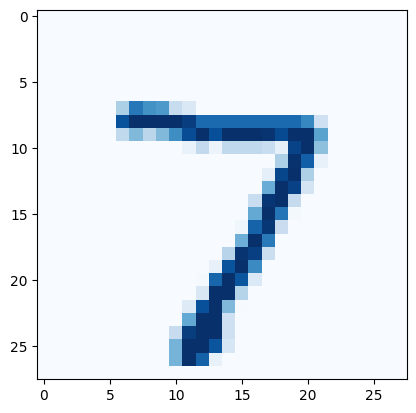

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape(28,28)
plt.imshow(image_array, cmap='Blues', interpolation='None')

Next we are going to work on prepping our data for processing by scaling it.

> Pixel values range from 0 to 255

> Neural networks work best with values that range from 0.01 to 0.99

> * input values of 0.0 kill weight updates and are only approached by, but not reached by, the logistic function

> * output values of 1.0 are only approached by, but not reached by, the logistic function

In [9]:
scaled_input = (np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

Our goal is for the neural network to classify the data (images) and assign the correct label. This means that:

> Each label will be one of ten numbers ranging from 0 to 9

> The labels will use target arrays

> We will use ten nodes, one for each number

We will use a four line code snippet to take a look at how this works

> the first line sets the number of output nodes to 10

> the second line uses the .zero function to create an array filled with zeros and adds the value 0.01 to account for the logistic function's aversion to 0.0

> the third line takes the first element of the MNIST dataset, which is the training label, and converts the string into an integer. We do this because we read the record from the source file as a text string. We next add 0.99 to account for the logistic function's aversion to 1.0

In [12]:
# 10 output node example

outNodes = 10
targets = np.zeros(outNodes) + 0.01
targets[int(all_values[0])] = 0.99

print(targets)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01]


Next we will scale up our work to account for the 28 x 28 = 784 pixel system that we are using

In [ ]:
# code to prep and input data into the neural network for training

# define the inputs needed to talk to the neural network class
inputNodes = 784
hiddenNodes = 100
outputNodes = 10
learningRate = 0.3
n = neuralNetwork(inputNodes, hiddenNodes, outputNodes, learningRate)

# load the MNIST training data csv file into a list
training_data_file = open('mnist_dataset/mnist_train_100.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# go through all records in the training data set
for record in training_data_list:
  # split the record by the ',' commas
  all_values = record.split(',')
  # scale and shift the inputs
  inputs = (np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01)
  # create the target output values (all 0.01, except for the desired label which is 0.99)
  targets_784 = np.zeros(outputNodes) + 0.01
  # all_values[0] is the target label for this record
  targets_784[int(all_values[0])] = 0.99
  n.train(inputs, targets)
  pass

Let's update the class with this work

In [24]:
import numpy as np

import scipy.special

import matplotlib.pyplot as plt
%matplotlib inline

# draft class definition for a neural network
class neuralNetwork:

  # intialize the neural network
  def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
    # layers and learning rates
    self.iNodes = inputNodes
    self.hNodes = hiddenNodes
    self.oNodes = outputNodes
    self.learnRate = learningRate
    # link weights connecting the layers via matrices
    self.wih = np.random.normal(0.0, pow(self.iNodes, -0.5), (self.hNodes, self.iNodes))
    self.who = np.random.normal(0.0, pow(self.hNodes, -0.5), (self.oNodes, self.hNodes))
    # sigmoid activation function
    self.activation_function = lambda x: scipy.special.expit(x)
    pass

  # train the neural network
  def train(self, inputs_list, targets_list):
    # convert the inputs list to a 2d array
    inputs = np.array(inputs_list, ndmin = 2).T
    # convert the targets list to a 2d array
    targets = np.array(targets_list, ndmin = 2).T
    # calculate signals into the hidden layer
    hidden_inputs = np.dot(self.wih, inputs)
    # calculate signals emerging from the hidden layer
    hidden_outputs = self.activation_function(hidden_inputs)
    # calculate signals into final output layer
    final_inputs = np.dot(self.who, hidden_outputs)
    # calculate signals emerging from the final output layer
    final_outputs = self.activation_function(final_inputs)

    # output layer error is (target - actual)
    output_errors = targets - final_outputs
    # hidden layer error
    hidden_errors = np.dot(self.who.T, output_errors)
    # update the link weights between hidden & output layers
    self.who += self.learnRate * np.dot((output_errors * final_outputs *
      (1.0 - final_outputs)), np.transpose(hidden_outputs))
    # update the link weights between input & hidden layers
    self.wih += self.learnRate * np.dot((hidden_errors * hidden_outputs *
      (1.0 - hidden_outputs)), np.transpose(inputs))
    pass

  # query the neural network
  def query(self, inputs_list):
    # convert inputs list to 2d array
    inputs = np.array(inputs_list, ndmin=2).T
    # calculate signals into hidden layer
    hidden_inputs = np.dot(self.wih, inputs)
    # calculate the signals emerging from hidden layer
    hidden_outputs = self.activation_function(hidden_inputs)
    # calculate signals into final output layer
    final_inputs = np.dot(self.who, hidden_outputs)
    # calculate the signals emerging from final output layer
    final_outputs = self.activation_function(final_inputs)
    return final_outputs

# code to prep and input data into the neural network for training

# define the inputs needed to talk to the neural network class
inputNodes = 784
hiddenNodes = 100
outputNodes = 10
learningRate = 0.3
n = neuralNetwork(inputNodes, hiddenNodes, outputNodes, learningRate)

# load the MNIST training data csv file into a list
training_data_file = open('mnist_train_100.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# go through all records in the training data set
for record in training_data_list:
  # split the record by the ',' commas
  all_values = record.split(',')
  # scale and shift the inputs
  inputs = (np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
  # create the target output values (all 0.01, except for the desired label which is 0.99)
  targets_784 = np.zeros(outputNodes) + 0.01
  # all_values[0] is the target label for this record
  targets_784[int(all_values[0])] = 0.99
  n.train(inputs, targets)
  pass

Let's build and run a test of the network

the data label is  7 

the array values are: 

[[0.02298638]
 [0.0223923 ]
 [0.02283003]
 [0.02210305]
 [0.02176126]
 [0.02105039]
 [0.02214755]
 [0.9808243 ]
 [0.02179456]
 [0.02258272]]

 the handwritten image is 



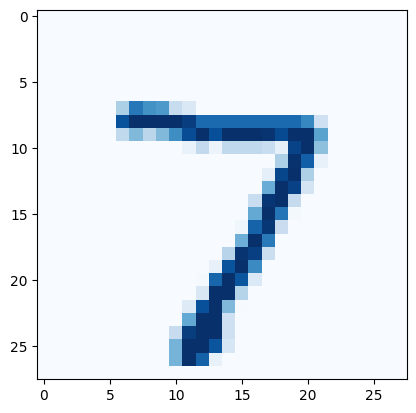

In [37]:
# load the MNIST test data csv file into a list
test_data_file = open('mnist_test_10.csv', )
test_data_list = test_data_file.readlines()
test_data_file.close()

# get the first test record
all_values = test_data_list[0].split(',')
# print the label
print('the data label is ', all_values[0], '\n')
# plot the image
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Blues', interpolation='None')
# show the outputs from each of the ten nodes
print('the array values are: \n')
print(n.query((np.asfarray(all_values[1:])/255.0 * 0.99 +0.01)))
print('\n the handwritten image is \n')